***
# <font color=green size=10>CURSO DE ESTATÍSTICA - PARTE 1</font>
***

## Trabalho de Análise Descritiva de um Conjunto de Dados

Utilizando os conhecimentos adquiridos em nosso treinamento realize uma análise descritiva básica de um conjunto de dados retirados da Pesquisa Nacional por Amostra de Domicílios - 2015 do IBGE. 

Vamos construir histogramas, calcular e avaliar medidas de tendência central, medidas separatrizes e de dispersão dos dados.

Siga o roteiro proposto e vá completando as células vazias. Procure pensar em mais informações interessantes que podem ser exploradas em nosso dataset.

# <font color=green>DATASET DO PROJETO</font>
***

### Pesquisa Nacional por Amostra de Domicílios - 2015

A <b>Pesquisa Nacional por Amostra de Domicílios - PNAD</b> investiga anualmente, de forma permanente, características gerais da população, de educação, trabalho, rendimento e habitação e outras, com periodicidade variável, de acordo com as necessidades de informação para o país, como as características sobre migração, fecundidade, nupcialidade, saúde, segurança alimentar, entre outros temas. O levantamento dessas estatísticas constitui, ao longo dos 49 anos de realização da pesquisa, um importante instrumento para formulação, validação e avaliação de políticas orientadas para o desenvolvimento socioeconômico e a melhoria das condições de vida no Brasil.

### Fonte dos Dados

https://ww2.ibge.gov.br/home/estatistica/populacao/trabalhoerendimento/pnad2015/microdados.shtm

### Variáveis utilizadas

> ### Renda
> ***

Rendimento mensal do trabalho principal para pessoas de 10 anos ou mais de idade.

> ### Idade
> ***

Idade do morador na data de referência em anos.

> ### Altura (elaboração própria)
> ***

Altura do morador em metros.

> ### UF
> ***

|Código|Descrição|
|---|---|
|11|Rondônia|
|12|Acre|
|13|Amazonas|
|14|Roraima|
|15|Pará|
|16|Amapá|
|17|Tocantins|
|21|Maranhão|
|22|Piauí|
|23|Ceará|
|24|Rio Grande do Norte|
|25|Paraíba|
|26|Pernambuco|
|27|Alagoas|
|28|Sergipe|
|29|Bahia|
|31|Minas Gerais|
|32|Espírito Santo|
|33|Rio de Janeiro|
|35|São Paulo|
|41|Paraná|
|42|Santa Catarina|
|43|Rio Grande do Sul|
|50|Mato Grosso do Sul|
|51|Mato Grosso|
|52|Goiás|
|53|Distrito Federal|

> ### Sexo	
> ***

|Código|Descrição|
|---|---|
|0|Masculino|
|1|Feminino|

> ### Anos de Estudo
> ***

|Código|Descrição|
|---|---|
|1|Sem instrução e menos de 1 ano|
|2|1 ano|
|3|2 anos|
|4|3 anos|
|5|4 anos|
|6|5 anos|
|7|6 anos|
|8|7 anos|
|9|8 anos|
|10|9 anos|
|11|10 anos|
|12|11 anos|
|13|12 anos|
|14|13 anos|
|15|14 anos|
|16|15 anos ou mais|
|17|Não determinados| 
||Não aplicável|

> ### Cor
> ***

|Código|Descrição|
|---|---|
|0|Indígena|
|2|Branca|
|4|Preta|
|6|Amarela|
|8|Parda|
|9|Sem declaração|

#### <font color='red'>Observação</font>
***
> Os seguintes tratamentos foram realizados nos dados originais:
> 1. Foram eliminados os registros onde a <b>Renda</b> era inválida (999 999 999 999);
> 2. Foram eliminados os registros onde a <b>Renda</b> era missing;
> 3. Foram considerados somente os registros das <b>Pessoas de Referência</b> de cada domicílio (responsável pelo domicílio).

***
***

### Utilize a célula abaixo para importar as biblioteca que precisar para executar as tarefas
#### <font color='red'>Sugestões: pandas, numpy, seaborn</font>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

### Importe o dataset e armazene o conteúdo em uma DataFrame

In [3]:
dados = pd.read_csv("C:/Users/ferna/Downloads/Data Science/Curso de Estatística - Parte 1/dados.csv")

### Visualize o conteúdo do DataFrame

In [4]:
dados.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


### Para avaliarmos o comportamento da variável RENDA vamos construir uma tabela de frequências considerando as seguintes classes em salários mínimos (SM)
#### <font color='blue'>Descreva os pontos mais relevantes que você observa na tabela e no gráfico.</font>

Classes de renda:

<b>A</b> ► Acima de 25 SM

<b>B</b> ► De 15 a 25 SM

<b>C</b> ► De 5 a 15 SM

<b>D</b> ► De 2 a 5 SM

<b>E</b> ► Até 2 SM

Para construir as classes de renda considere que o salário mínimo na época da pesquisa era de <b>R$ 788,00</b>.

#### Siga os passos abaixo:

### 1º Definir os intevalos das classes em reais (R$)

In [5]:
classes = [
    dados.Renda.min(),
    2 * 788,
    5 * 788,
    15 * 788,
    25 * 788,
    dados.Renda.max()
]
classes

### 2º Definir os labels das classes

In [6]:
labels = ['E', 'D', 'C', 'B', 'A']

### 3º Construir a coluna de frequências

In [7]:
dados['Classe'] = pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True)
dados

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura,Classe
0,11,0,23,8,12,800,1.603808,E
1,11,1,23,2,12,1150,1.739790,E
2,11,1,35,8,15,880,1.760444,E
3,11,0,46,2,6,3500,1.783158,C
4,11,1,47,8,9,150,1.690631,E
...,...,...,...,...,...,...,...,...
76835,53,1,46,2,11,812,1.687030,E
76836,53,0,30,4,7,1500,1.792934,E
76837,53,0,32,8,12,1300,1.830587,E
76838,53,0,57,8,4,1500,1.726344,E


In [8]:
frequencia = dados['Classe'].value_counts()
frequencia

E    49755
D    16700
C     7599
B     2178
A      608
Name: Classe, dtype: int64

### 4º Construir a coluna de percentuais

In [9]:
percentual = pd.value_counts(pd.cut(x = dados.Renda, bins = classes, labels = labels, include_lowest = True), normalize = True)*100
percentual.round(2)

E    64.75
D    21.73
C     9.89
B     2.83
A     0.79
Name: Renda, dtype: float64

### 5º Juntar as colunas de frequência e percentuais e ordenar as linhas de acordo com os labels das classes

In [10]:
freq_personalizada = pd.DataFrame({'Frequência': frequencia, 'Percentual (%)': percentual.round(2)})
freq_personalizada.reset_index(inplace = True)

In [113]:
freq_personalizada.columns = ['Categoria', 'Frequência', 'Percentual (%)']
freq_personalizada.sort_index(ascending = False)

,Categoria,Frequência,Percentual (%)
4,A,608,0.79
3,B,2178,2.83
2,C,7599,9.89
1,D,16700,21.73
0,E,49755,64.75


### Construa um gráfico de barras para visualizar as informações da tabela de frequências acima

Text(0, 0.5, 'Frequência (%)')

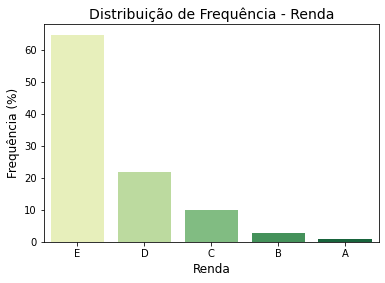

In [12]:
import matplotlib.pyplot as plt

#criando uma figure, axes
fig, ax = plt.subplots()

#criando o gráfico de barras 
sns.barplot(x = freq_personalizada['Categoria'], y=freq_personalizada['Percentual (%)'], ax=ax, data=dados, palette="YlGn")

#adicionando título
ax.set_title("Distribuição de Frequência - Renda", fontdict={'fontsize':14})

#mudando nome e tamanho do label x
ax.set_xlabel('Renda', fontdict={'fontsize':12})

#mudando nome e tamanho do label y
ax.set_ylabel('Frequência (%)', fontdict={'fontsize':12})

> ### Conclusões

É possível perceber que mais da metade da amostra recebe até 2 SM.

### Crie um histograma para as variáveis QUANTITATIVAS de nosso dataset
#### <font color='blue'>Descreva os pontos mais relevantes que você observa nos gráficos (assimetrias e seus tipos, possíveis causas para determinados comportamentos etc.)</font>

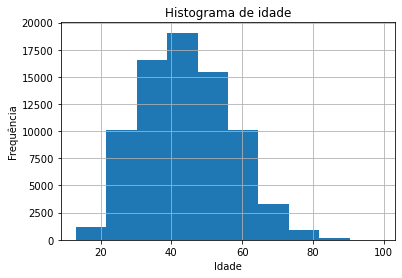

In [114]:
plt.hist(dados.Idade)
plt.grid()
plt.title('Histograma de idade')
plt.xlabel('Idade')
plt.ylabel('Frequência')

plt.show()

<AxesSubplot:title={'center':'Distribuição de Frequências - RENDA'}, xlabel='R$', ylabel='Count'>

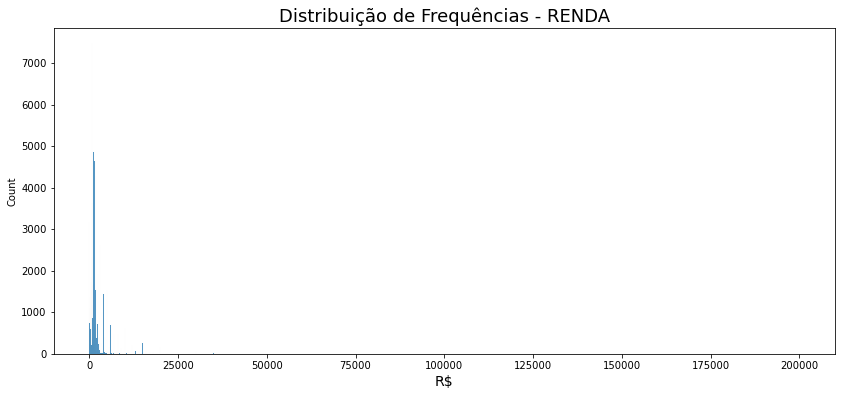

In [124]:
ax = sns.histplot(dados['Renda'])
ax.figure.set_size_inches(14, 6)
ax.set_title('Distribuição de Frequências - RENDA', fontsize=18)
ax.set_xlabel('R$', fontsize=14)
ax

In [15]:
dados.columns = ['UF', 'Sexo', 'Idade', 'Cor', 'Anos_de_Estudo', 'Renda', 'Altura', 'Classe']

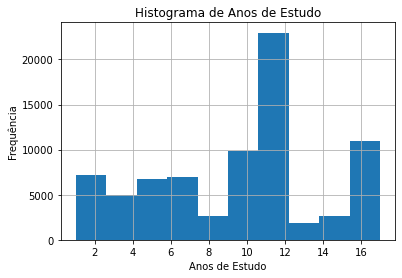

In [16]:
plt.hist(dados.Anos_de_Estudo)
plt.grid()
plt.title('Histograma de Anos de Estudo')
plt.xlabel('Anos de Estudo')
plt.ylabel('Frequência')

plt.show()

In [17]:
percentual = pd.value_counts(dados.Anos_de_Estudo, normalize = True)*100
percentual.round(2)

12    27.13
16    14.05
9     10.39
5      8.76
1      7.61
6      5.86
4      3.76
8      3.50
7      3.18
11     2.76
3      2.73
10     2.39
13     2.39
15     1.81
2      1.81
14     1.63
17     0.25
Name: Anos_de_Estudo, dtype: float64

> ### Conclusões

Pode-se concluir que o número de pessoas que estudaram até 12 anos é o maior da amostra, seguido de 16 anos e 9 anos. Além disso, pode se concluir que temos uma assimetria muito grande em relação a Renda. Podemos dizer que os anos de estudo e a renda estão relacionadas? Quem estuda mais, ganha mais? Quem estudou menos, ganha menos?

### Para a variável RENDA, construa um histograma somente com as informações das pessoas com rendimento até R$ 20.000,00

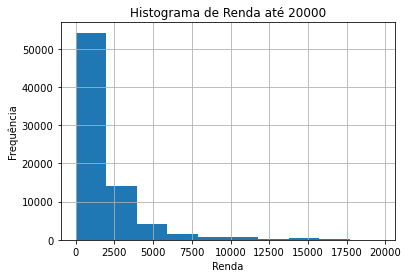

In [126]:
plt.hist(dados.query('Renda < 20000').Renda)
plt.grid()
plt.title('Histograma de Renda até 20000')
plt.xlabel('Renda')
plt.ylabel('Frequência')

plt.show()

### Construa uma tabela de frequências e uma com os percentuais do cruzando das variáveis SEXO e COR
#### <font color='blue'>Avalie o resultado da tabela e escreva suas principais conclusões</font>
#### <font color='red'>Utilize os dicionários abaixo para renomear as linha e colunas das tabelas de frequências e dos gráficos em nosso projeto</font>

In [19]:
sexo = {
    0: 'Masculino', 
    1: 'Feminino'
}
cor = {
    0: 'Indígena', 
    2: 'Branca', 
    4: 'Preta', 
    6: 'Amarela', 
    8: 'Parda', 
    9: 'Sem declaração'
}
anos_de_estudo = {
    1: 'Sem instrução e menos de 1 ano', 
    2: '1 ano', 
    3: '2 anos', 
    4: '3 anos', 
    5: '4 anos', 
    6: '5 anos', 
    7: '6 anos', 
    8: '7 anos', 
    9: '8 anos', 
    10: '9 anos', 
    11: '10 anos', 
    12: '11 anos', 
    13: '12 anos', 
    14: '13 anos', 
    15: '14 anos', 
    16: '15 anos ou mais', 
    17: 'Não determinados'
}
uf = {
    11: 'Rondônia', 
    12: 'Acre', 
    13: 'Amazonas', 
    14: 'Roraima', 
    15: 'Pará', 
    16: 'Amapá', 
    17: 'Tocantins', 
    21: 'Maranhão', 
    22: 'Piauí', 
    23: 'Ceará', 
    24: 'Rio Grande do Norte', 
    25: 'Paraíba', 
    26: 'Pernambuco', 
    27: 'Alagoas', 
    28: 'Sergipe', 
    29: 'Bahia', 
    31: 'Minas Gerais', 
    32: 'Espírito Santo', 
    33: 'Rio de Janeiro', 
    35: 'São Paulo', 
    41: 'Paraná', 
    42: 'Santa Catarina', 
    43: 'Rio Grande do Sul', 
    50: 'Mato Grosso do Sul', 
    51: 'Mato Grosso', 
    52: 'Goiás', 
    53: 'Distrito Federal'
}//

In [20]:
frequencia_sexo_cor = pd.crosstab(dados.Sexo, dados.Cor)
frequencia_sexo_cor.rename(index = sexo, inplace = True)
frequencia_sexo_cor.rename(columns = cor, inplace = True)
frequencia_sexo_cor['Total_Linha'] = frequencia_sexo_cor.sum(axis = 1)
frequencia_sexo_cor

Cor,Indígena,Branca,Preta,Amarela,Parda,Total_Linha
Sexo,,,,,,
Masculino,256,22194,5502,235,25063,53250
Feminino,101,9621,2889,117,10862,23590


In [21]:
frequencia_sexo_cor_perct = pd.crosstab(dados.Sexo, dados.Cor, normalize=True) * 100
frequencia_sexo_cor_perct.rename(index = sexo, inplace = True)
frequencia_sexo_cor_perct.rename(columns = cor, inplace = True)
frequencia_sexo_cor_perct['Total_Linha'] = frequencia_sexo_cor_perct.sum(axis = 1)
frequencia_sexo_cor_perct

Cor,Indígena,Branca,Preta,Amarela,Parda,Total_Linha
Sexo,,,,,,
Masculino,0.333160,28.883394,7.160333,0.305830,32.617126,69.299844
Feminino,0.131442,12.520822,3.759761,0.152264,14.135867,30.700156


> ### Conclusões

De acordo com a tabela de frequência, podemos perceber que mais de 30% da população chefe de família são homens pardos. E que o número de mulheres indigenas e amarelas chefe de família é pequeno. Além de perceber que mais de 69% da amostra é composto de homens.

## Realize, para a variável RENDA, uma análise descritiva com as ferramentas que aprendemos em nosso treinamento

### Obtenha a média aritimética

In [22]:
dados.Renda.mean()

2000.3831988547631

### Obtenha a mediana

In [23]:
dados.Renda.median()

1200.0

### Obtenha a moda

In [24]:
dados.Renda.mode()

0    788
dtype: int64

### Obtenha o desvio médio absoluto

In [25]:
dados.Renda.mad()

1526.4951371644931

### Obtenha a variância

In [26]:
dados.Renda.var()

11044906.00622118

### Obtenha o desvio-padrão

In [27]:
dados.Renda.std()

3323.3877303470294

### Obtenha a média, mediana e valor máximo da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mean', 'median', 'max'}</i></font>

In [133]:
tendencia = dados.groupby(['Cor', 'Sexo'])['Renda'].aggregate(['mean', 'median', 'max']).round(2)
tendencia

mean  median     max
Cor      Sexo                              
Amarela  Feminino   3027.34  1500.0   20000
         Masculino  4758.25  2800.0   50000
Branca   Feminino   2109.87  1200.0  100000
         Masculino  2925.74  1700.0  200000
Indígena Feminino   2464.39   788.0  120000
         Masculino  1081.71   797.5   10000
Parda    Feminino   1176.76   800.0   30000
         Masculino  1659.58  1200.0  100000
Preta    Feminino   1134.60   800.0   23000
         Masculino  1603.86  1200.0   50000

> ### Conclusões

Podemos perceber que as pessoas que possuem a cor Preta e Amarela são as que têm renda mais baixa. E que há uma discrepancia entre os salários do sexo feminino e masculino.

### Obtenha as medidas de dispersão da variável RENDA segundo SEXO e COR
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = {'mad', 'var', 'std'}</i></font>

In [132]:
#mad, std e var 
dispersao = dados.groupby(['Cor', 'Sexo'])['Renda'].aggregate(['mad', 'var', 'std']).round(2)
dispersao

mad           var       std
Cor      Sexo                                      
Amarela  Feminino   2549.15  1.392166e+07   3731.17
         Masculino  3709.60  3.295707e+07   5740.82
Branca   Feminino   1670.97  1.056909e+07   3251.01
         Masculino  2261.01  2.257002e+07   4750.79
Indígena Feminino   3007.89  1.429818e+08  11957.50
         Masculino   798.91  1.449841e+06   1204.09
Parda    Feminino    811.58  2.547960e+06   1596.23
         Masculino  1125.83  5.345747e+06   2312.09
Preta    Feminino    705.45  1.821960e+06   1349.80
         Masculino   975.60  3.749294e+06   1936.31

> ### Conclusões
Pode-se concluir que as pessoas de cores Parda e Indígena estão mais longe do valor central (variância). Percebe-se um grande desvio no sexo Masculino e nas cores Amarela e Indígena.
O sexo Feminino e a cor Preta e Parda estão mais perto da média.


### Construa um box plot da variável RENDA segundo SEXO e COR
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Cor'>

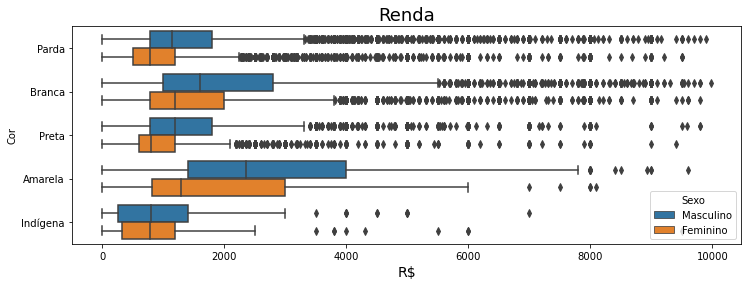

In [135]:
ax = sns.boxplot(x = 'Renda', y = 'Cor', hue = 'Sexo', data = dados.query('Renda < 10000'), orient = 'h')

ax.figure.set_size_inches(12, 4)
ax.set_title('Renda', fontsize=18)
ax.set_xlabel('R$', fontsize=14)

ax

In [60]:
#alterando os dados de número para classificação (ex: 0 = Masculino)
dados['Cor'] = dados['Cor'].replace(cor)
dados['Sexo'] = dados['Sexo'].replace(sexo)

> ### Conclusões

Existe uma dispersão muito grande em relação a cor Parda e Branca. Percebe-se que os homens ganham mais que as mulheres e que a média de salário é maior, exceto na Cor Indígena que tanto em homem, quanto em mulher, as médias se parecem e o salário do sexo masculo é um pouco mais baixo.

# <font color="red">DESAFIO<font>
### Qual percentual de pessoas de nosso <i>dataset</i> ganham um salário mínimo (R$ 788,00) ou menos?
#### <font color='red'>Utilize a função <i>percentileofscore()</i> do <i>scipy</i> para realizar estas análises.</font>
#### Mais informações: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html


In [136]:
from scipy import stats

percentual = stats.percentileofscore(dados.Renda, 788, kind = 'weak')
print("{0:.2f}%".format(percentual))

28.87%


### Qual o valor máximo ganho por 99% das pessoas de nosso <i>dataset</i>?
#### <font color='red'>Utilize o método <i>quantile()</i> do <i>pandas</i> para realizar estas análises.</font>

In [137]:
valor = dados.Renda.quantile(.99)
print("R$ {0:.2f}".format(valor))

R$ 15000.00


### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>O parâmento <i>aggfunc</i> da função <i>crosstab()</i> pode receber uma lista de funções. Exemplo: <i>aggfunc = ['mean', 'median', 'max', 'std']</i></font>

In [62]:
desafio = dados.groupby(['Anos_de_Estudo', 'Sexo'])['Renda'].aggregate(['mean', 'median', 'max', 'std'])

desafio 

mean  median     max          std
Anos_de_Estudo Sexo                                               
1              Feminino    516.201748     390   10000   639.311534
               Masculino   799.494638     700   30000  1023.904884
2              Feminino    492.771987     400    2000   425.291842
               Masculino   895.629047     788   30000  1331.950552
3              Feminino    529.911638     450    4000   498.234168
               Masculino   931.178986     788   40000  1435.173827
4              Feminino    546.853916     500    3500   424.124446
               Masculino  1109.203862     800   80000  2143.800133
5              Feminino    704.279111     788   10000   629.553397
               Masculino  1302.329283    1000   50000  1419.821787
6              Feminino    781.389776     788    8000   635.782641
               Masculino  1338.653218    1045   35000  1484.650587
7              Feminino    833.732824     788    6000   574.547028
               Masculino  1448.875419    1200   25000  1476.628602
8              Feminino    830.751004     788    9000   602.038029
               Masculino  1465.497940    1200   40000  1419.708673
9              Feminino    933.615351     800   18000   896.781213
               Masculino  1639.396667    1300   30000  1515.583715
10             Feminino    868.021700     788   20000   973.221652
               Masculino  1508.038850    1200   60000  2137.664774
11             Feminino    925.919225     800    6000   620.611907
               Masculino  1731.270847    1218   45000  2078.609734
12             Feminino   1286.790889    1000  100000  1819.040417
               Masculino  2117.060504    1500  200000  2676.538942
13             Feminino   1682.313725    1200  120000  4851.833513
               Masculino  2470.330776    1800   30000  2268.081538
14             Feminino   1911.730047    1300   20000  2053.789771
               Masculino  3195.099154    2400   25000  2797.116800
15             Feminino   2226.460457    1600   20000  2064.083336
               Masculino  3706.620269    2500   50000  3987.214974
16             Feminino   3899.513231    2800  100000  4212.770709
               Masculino  6134.279790    4000  200000  7447.613594
17             Feminino    798.174419     788    3000   459.985964
               Masculino  1295.761905    1200    7000   979.648745

### Construa um box plot da variável RENDA segundo ANOS DE ESTUDO e SEXO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos de pessoas analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>
#### <font color='red'>2º - Utilize a variável IDADE para identificar se a desigualdade se verifica para pessoas de mesma idade. Exemplo: <i>data=dados.query('Renda < 10000 and Idade == 40')</i> ou <i>data=dados.query('Renda < 10000 and Idade == 50')</i></font>
#### <font color='red'>3º - Para incluir uma terceira variável na construção de um boxplot utilize o parâmetro <i>hue</i> e indique a variável que quer incluir na subdivisão.</font>
#### Mais informações: https://seaborn.pydata.org/generated/seaborn.boxplot.html

<AxesSubplot:title={'center':'Renda'}, xlabel='R$', ylabel='Anos_de_Estudo'>

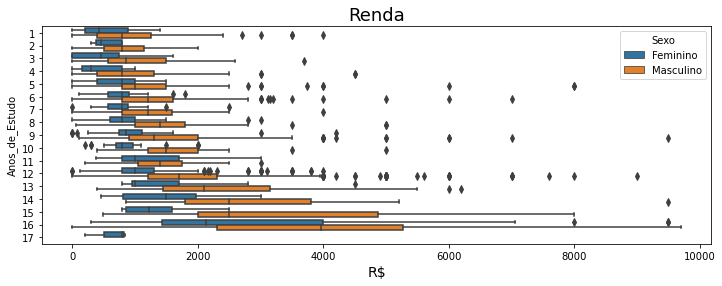

In [138]:
ay = sns.boxplot(x = 'Renda', y = 'Anos_de_Estudo', hue = 'Sexo', data = dados.query('Renda < 10000 and Idade == 40'), orient = 'h')

ay.figure.set_size_inches(12, 4)
ay.set_title('Renda', fontsize=18)
ay.set_xlabel('R$', fontsize=14)

ay

> ### Conclusões

Percebe-se que as mulheres com mais anos de estudo possuem uma maior média de salário. 

### Obtenha a média, mediana, valor máximo e desvio-padrão da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>Destaque os pontos mais importante que você observa nas tabulações</font>
#### <font color='red'>Utilize o método <i>groupby()</i> do <i>pandas</i> juntamente com o método <i>agg()</i> para contruir a tabulação. O método <i>agg()</i> pode receber um dicionário especificando qual coluna do DataFrame deve ser utilizada e qual lista de funções estatísticas queremos obter, por exemplo: <i>dados.groupby(['UF']).agg({'Renda': ['mean', 'median', 'max', 'std']})</i></font>

In [81]:
dados['UF'] = dados['UF'].replace(uf)
dados

,UF,Sexo,Idade,Cor,Anos_de_Estudo,Renda,Altura,Classe,Teste
0,Rondônia,Masculino,23,Parda,12,800,1.603808,E,Parda
1,Rondônia,Feminino,23,Branca,12,1150,1.739790,E,Branca
2,Rondônia,Feminino,35,Parda,15,880,1.760444,E,Parda
3,Rondônia,Masculino,46,Branca,6,3500,1.783158,C,Branca
4,Rondônia,Feminino,47,Parda,9,150,1.690631,E,Parda
...,...,...,...,...,...,...,...,...,...
76835,Distrito Federal,Feminino,46,Branca,11,812,1.687030,E,Branca
76836,Distrito Federal,Masculino,30,Preta,7,1500,1.792934,E,Preta
76837,Distrito Federal,Masculino,32,Parda,12,1300,1.830587,E,Parda
76838,Distrito Federal,Masculino,57,Parda,4,1500,1.726344,E,Parda


In [141]:
medidas_desafio = dados.groupby(['UF'])['Renda'].aggregate(['mean', 'median', 'max', 'std'])
medidas_desafio.sort_values(['max'])

,mean,median,max,std
UF,,,,
Alagoas,1144.552602,788,11000,1237.856197
Rio Grande do Norte,1344.721480,800,15500,1651.805500
Amapá,1861.353516,1200,15580,2020.688632
Sergipe,1109.111111,788,16000,1478.997878
Roraima,1783.588889,1000,20000,2079.659238
Amazonas,1445.130100,900,22000,1757.935591
Ceará,1255.403692,789,25000,1821.963536
Acre,1506.091782,900,30000,2276.233415
Paraíba,1293.370487,788,30000,1950.272431


### Construa um box plot da variável RENDA segundo as UNIDADES DA FEDERAÇÃO
#### <font color='blue'>É possível verificar algum comportamento diferenciado no rendimento entre os grupos analisados? Avalie o gráfico e destaque os pontos mais importantes.</font>
#### <font color='red'>1º - Utilize somente as informações de pessoas com renda abaixo de R$ 10.000</font>

<AxesSubplot:title={'center':'Renda x Estados'}, xlabel='Estados', ylabel='Renda'>

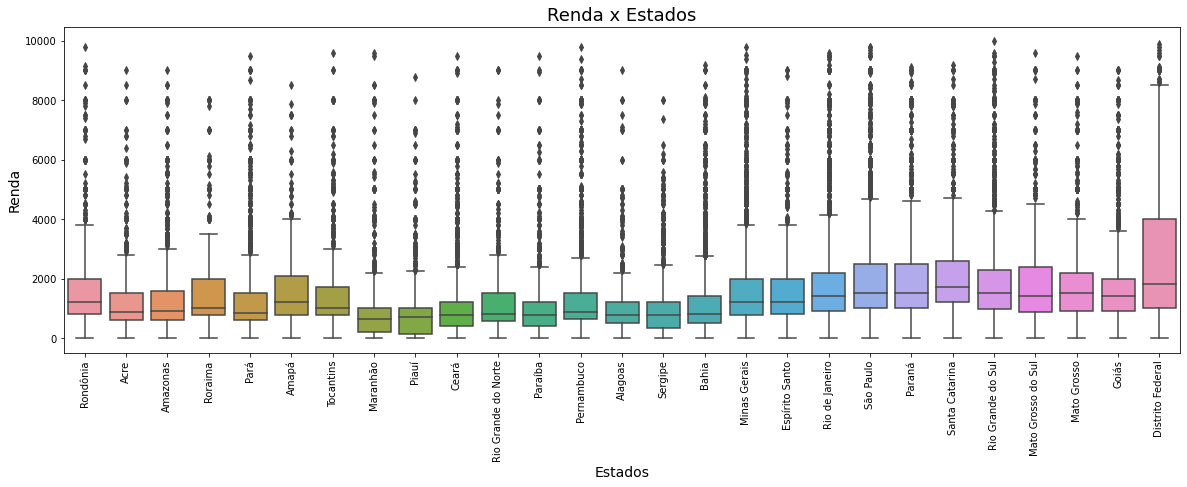

In [111]:
az = sns.boxplot(x = 'UF', y = 'Renda', data = dados.query('Renda < 10000'))

az.figure.set_size_inches(20, 6)
az.set_title('Renda x Estados', fontsize=18)
az.set_xlabel('Estados', fontsize=14)
az.set_ylabel('Renda', fontsize=14)
plt.xticks(rotation=90)

az

> ### Conclusões

Podemos perceber que o Distrito Federal possui a maior média e mediana de salário e o Maranhão possui a menor média e mediana. O Valor máximo do DF é bem discrepante em relação aos outros.